In [16]:
# Superstore Sales & Profit Analysis

## Objective
# Analyze superstore sales data to understand monthly trends, regional performance,
# category profitability, and loss-making orders using Python.


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


In [18]:
df = pd.read_csv("superstore.csv")
df.head()


,order_id,order_date,region,category,sub_category,sales,profit
0,1,2024-01-05,South,Furniture,Chairs,5000,800
1,2,2024-01-07,East,Technology,Phones,15000,3000
2,3,2024-01-10,West,Office Supplies,Binders,2000,300
3,4,2024-02-02,South,Technology,Laptops,45000,7000
4,5,2024-02-05,North,Furniture,Tables,12000,-1500


In [19]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_id      10 non-null     int64 
 1   order_date    10 non-null     object
 2   region        10 non-null     object
 3   category      10 non-null     object
 4   sub_category  10 non-null     object
 5   sales         10 non-null     int64 
 6   profit        10 non-null     int64 
dtypes: int64(3), object(4)
memory usage: 692.0+ bytes


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   order_id      10 non-null     int64 
 1   order_date    10 non-null     object
 2   region        10 non-null     object
 3   category      10 non-null     object
 4   sub_category  10 non-null     object
 5   sales         10 non-null     int64 
 6   profit        10 non-null     int64 
dtypes: int64(3), object(4)
memory usage: 692.0+ bytes


In [21]:
df["order_date"] = pd.to_datetime(df["order_date"])
df.head()

,order_id,order_date,region,category,sub_category,sales,profit
0,1,2024-01-05,South,Furniture,Chairs,5000,800
1,2,2024-01-07,East,Technology,Phones,15000,3000
2,3,2024-01-10,West,Office Supplies,Binders,2000,300
3,4,2024-02-02,South,Technology,Laptops,45000,7000
4,5,2024-02-05,North,Furniture,Tables,12000,-1500


In [22]:
df["month"] = df["order_date"].dt.to_period("M")
df[["order_date", "month"]].head()

,order_date,month
0,2024-01-05,2024-01
1,2024-01-07,2024-01
2,2024-01-10,2024-01
3,2024-02-02,2024-02
4,2024-02-05,2024-02


In [23]:
monthly_sales = df.groupby("month")["sales"].sum()
monthly_profit = df.groupby("month")["profit"].sum()

monthly_sales, monthly_profit


(month
 2024-01    22000
 2024-02    75000
 2024-03    16500
 Freq: M, Name: sales, dtype: int64,
 month
 2024-01    4100
 2024-02    9000
 2024-03    2850
 Freq: M, Name: profit, dtype: int64)

In [24]:
region_summary = df.groupby("region")[["sales", "profit"]].sum()
region_summary


,sales,profit
region,,
East,35500,6850
North,17000,-300
South,56000,8700
West,5000,700


In [25]:
loss_orders = df[df["profit"] < 0]
loss_orders


,order_id,order_date,region,category,sub_category,sales,profit,month
4,5,2024-02-05,North,Furniture,Tables,12000,-1500,2024-02


c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


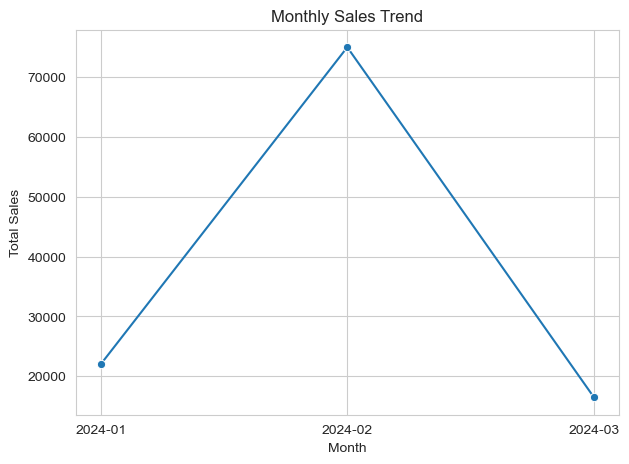

In [26]:
plt.figure(figsize=(7,5))
sns.lineplot(
    x=monthly_sales.index.astype(str),
    y=monthly_sales.values,
    marker="o"
)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()


c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


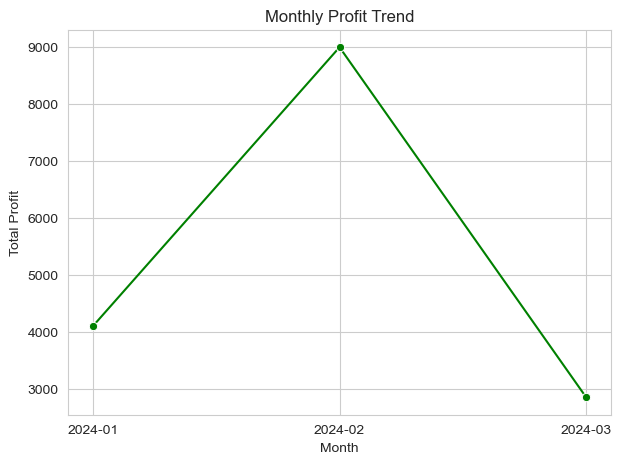

In [27]:
plt.figure(figsize=(7,5))
sns.lineplot(
    x=monthly_profit.index.astype(str),
    y=monthly_profit.values,
    marker="o",
    color="green"
)
plt.title("Monthly Profit Trend")
plt.xlabel("Month")
plt.ylabel("Total Profit")
plt.show()


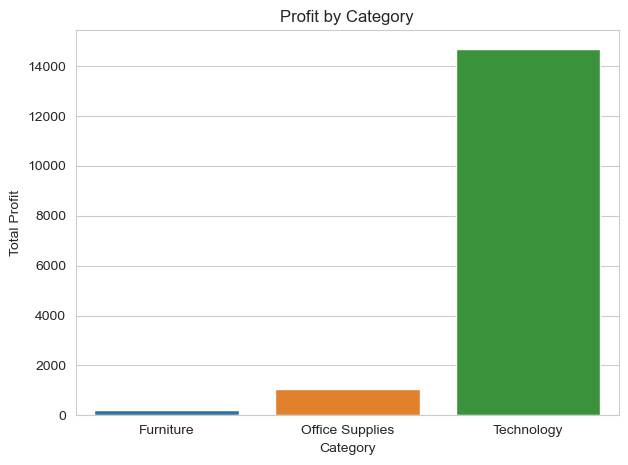

In [28]:
category_profit = df.groupby("category")["profit"].sum()

plt.figure(figsize=(7,5))
sns.barplot(
    x=category_profit.index,
    y=category_profit.values
)
plt.title("Profit by Category")
plt.xlabel("Category")
plt.ylabel("Total Profit")
plt.show()


In [29]:
## Key Business Insights

# - Sales and profit do not always move together.
# - Technology category generates the highest profit.
# - Some regions produce good revenue but need cost optimization.
# - Loss-making orders indicate pricing or discount issues.
# - Monthly trend analysis helps identify business seasonality.
